---
# COM4402 INTRODUCCIÓN A LA INTELIGENCIA ARTIFICIAL - PROYECTO FINAL
---


- INTEGRANTES: KEVIN FUENTES N. Y JOSÉ SALGADO M.
- DOCENTE: HABRIEL CABAS M.
- AYUDANTE: NAIRO TORRES F.

---
## PARTE 1 - CARGA DE ARCHIVOS Y ANÁLISIS EXPLORATORIO DE DATOS
---

In [241]:
# CARGAMOS LAS LIBRERIAS NECESARIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score


In [242]:
# CARGAMOS EL DATAFRAME Y VISUALIZAMOS PRIMERAS FILAS
df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [243]:
# OBTENER CANTIDAD DE FILAS Y DE COLUMNAS
print(f'Cantidad de filas: {df.shape[0]}')
print(f'Cantidad de columnas: {df.shape[1]}')

Cantidad de filas: 2499
Cantidad de columnas: 13


In [244]:
# OBTENER EL TIPO DE DATOS DEL DATASET
df.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [245]:
# OBTENER ESTADÍSTICAS BÁSICAS
df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [246]:
# VERIFICAR EXISTENCIA DE VALORES NULOS
df.isnull().sum().any()

False

In [247]:
# CHEKEAMOS CANTIDAD DE VEHÍCULOS SEGÚN MARCA
df['brand'].value_counts()

brand
ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
peterbilt             4
audi                  4
acura                 3
lincoln               2
lexus                 2
mazda                 2
maserati              1
toyota                1
harley-davidson       1
jaguar                1
ram                   1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

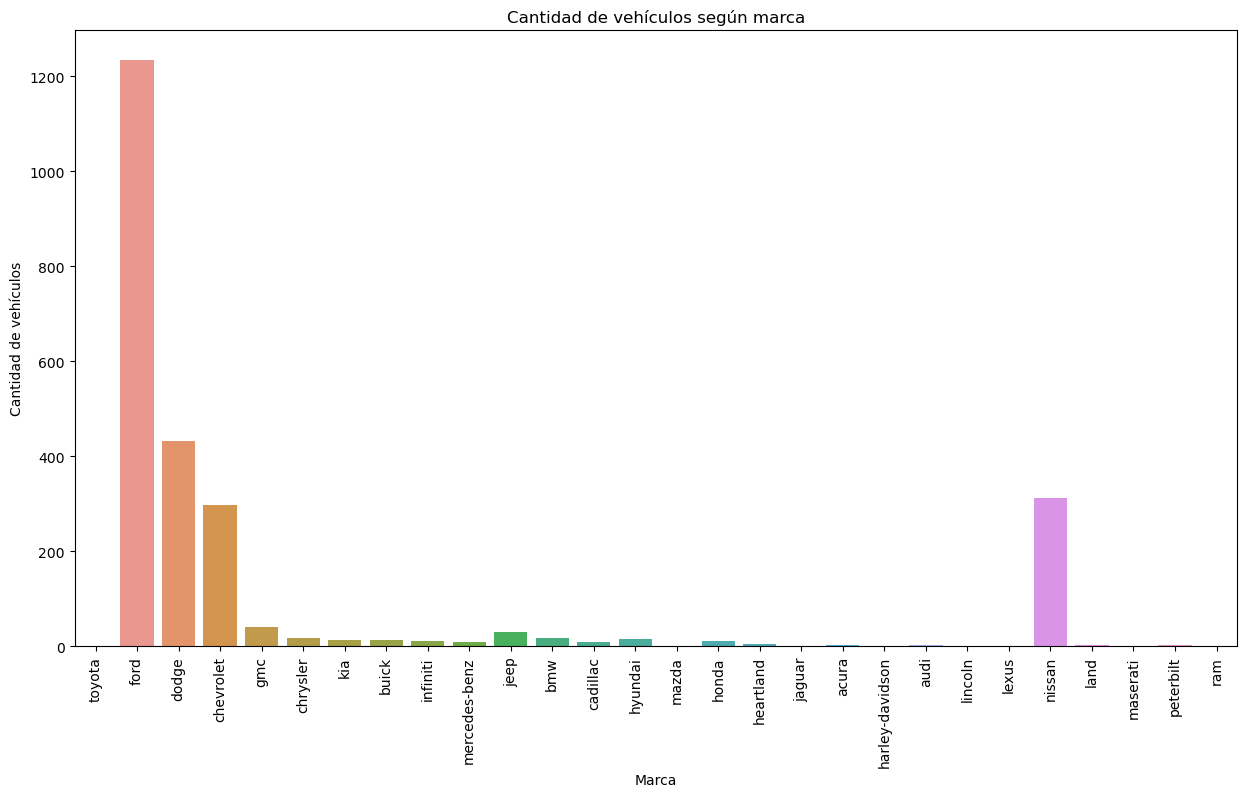

In [248]:
# VISUALIZAMOS GRÁFICAMENTE LA INFORMACIÓN ANTERIOR
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='brand')
plt.xlabel('Marca')
plt.xticks(rotation=90)
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehículos según marca')
plt.show

---
## PARTE 2 - PREPROCESAMIENTO DE DATOS Y REDUCCIÓN DE DIMENSIONALIDAD
---

In [249]:
# ELIMINAMOS COLUMNAS IRRELEVANTES
df = df.drop(columns=['Unnamed: 0', 'title_status', 'color', 'vin', 'lot', 'country', 'condition'])
df.head()

,price,brand,model,year,mileage,state
0,6300,toyota,cruiser,2008,274117.0,new jersey
1,2899,ford,se,2011,190552.0,tennessee
2,5350,dodge,mpv,2018,39590.0,georgia
3,25000,ford,door,2014,64146.0,virginia
4,27700,chevrolet,1500,2018,6654.0,florida


In [250]:
# Variables categóricas a codificar
columnas_categoricas = ['brand', 'model', 'state']

In [251]:
# Aplicar Label Encoding
le = LabelEncoder()
for col in columnas_categoricas:
    df[col] = le.fit_transform(df[col])

In [252]:
# Revisar resultado
print(df.head())

   price  brand  model  year   mileage  state
0   6300     27     25  2008  274117.0     24
1   2899      8     92  2011  190552.0     35
2   5350      7     75  2018   39590.0      7
3  25000      8     32  2014   64146.0     39
4  27700      5      0  2018    6654.0      6


In [253]:
# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

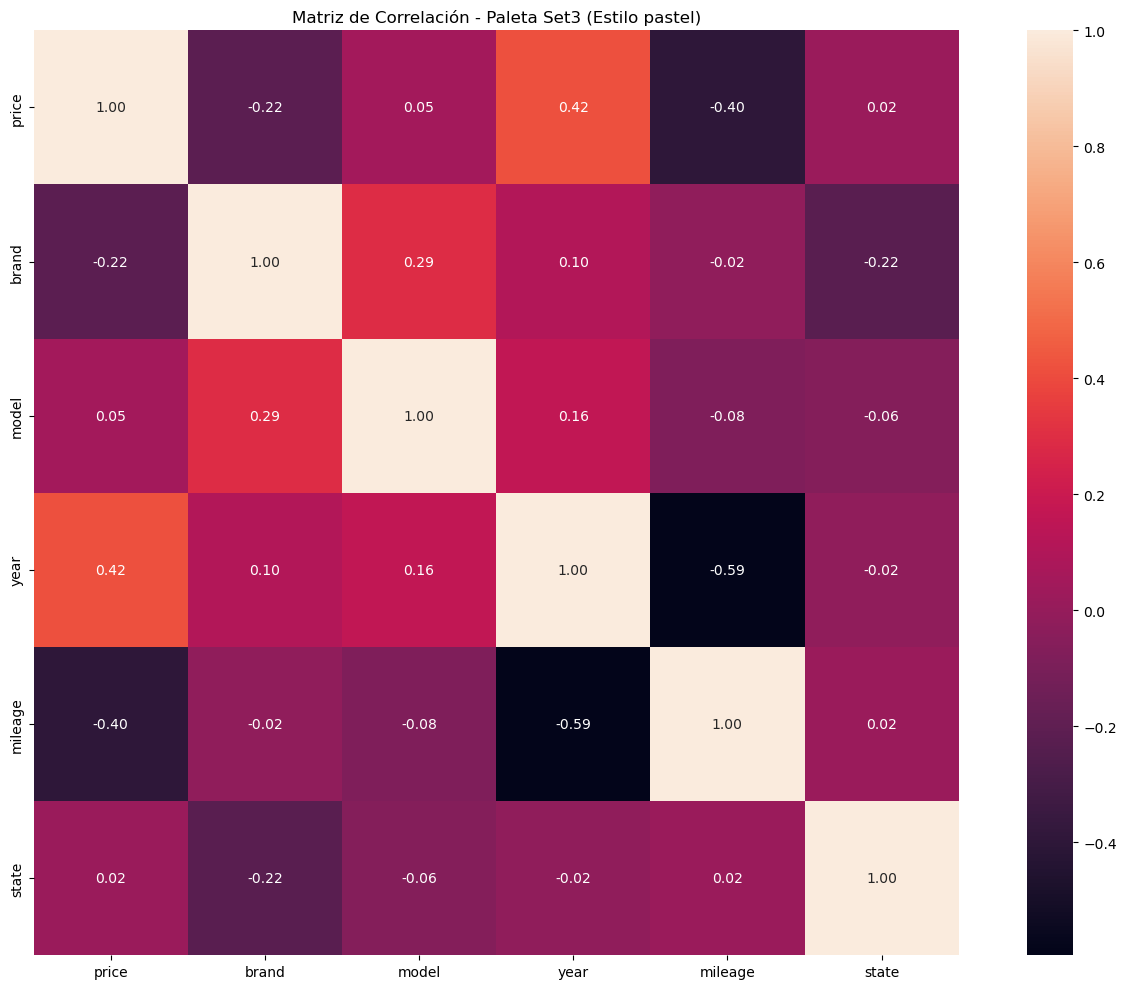

In [254]:
# Graficar con paleta tipo pastel similar a la del gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True)
plt.title("Matriz de Correlación - Paleta Set3 (Estilo pastel)")
plt.tight_layout()
plt.show()

---
## PARTE 3 - ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
---

REGRESIÓN LINEAL

In [255]:
# SEPARAMOS LAS VARIABLE PRICE
X = df.drop(columns=['price'])
y = df['price']

REGRESIÓN SIN PCA

In [256]:
# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [258]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

In [259]:
evaluar_modelo("Regresión Lineal sin PCA", y_test, y_pred_lr)


Regresión Lineal sin PCA
Mean Squared Error (MSE):     111986607.93
Mean Absolute Error (MAE):    7850.04
Mean Absolute Percentage Error: 556885921375578240.0000
R² Score:                     0.2934


In [260]:
scores = cross_val_score(LinearRegression(), X_scaled, y, scoring='r2', cv=5)
print("R² promedio (CV):", scores.mean().round(2))

R² promedio (CV): 0.17


REGRESIÓN CON PCA

In [261]:
# 3. Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [262]:
# 4. Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [263]:
# 5. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [264]:
# 6. Entrenar modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

LinearRegression()

In [265]:
# 7. Predicción
y_pred_lr = modelo_lr.predict(X_test)

In [266]:
# 8. Evaluación
def evaluar_modelo(nombre, y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)
    
    print(f"\n{nombre}")
    print(f"Mean Squared Error (MSE):     {mse:.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}")
    print(f"R² Score:                     {r2:.4f}")

evaluar_modelo("Regresión Lineal con PCA", y_test, y_pred_lr)


Regresión Lineal con PCA
Mean Squared Error (MSE):     111986607.93
Mean Absolute Error (MAE):    7850.04
Mean Absolute Percentage Error: 556885921375578368.0000
R² Score:                     0.2934


In [267]:
# 9. Validación cruzada
scores = cross_val_score(LinearRegression(), X_pca, y, scoring='r2', cv=5)
print("R² promedio (CV):", scores.mean().round(2))

R² promedio (CV): 0.17


RANDON FOREST REGRESIÓN 

RANDOM FOREST REGRESIÓN CON PCA

In [268]:

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación
def evaluar_modelo(nombre, y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    print(f"\n{nombre}")
    print(f"Mean Squared Error (MSE):     {mse:,.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:,.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}")
    print(f"R² Score:                     {r2:.4f}")

# Mostrar resultados
evaluar_modelo("Random Forest sin PCA", y_test, y_pred_rf)

# Validación cruzada (cross-validation)
scores_rf = cross_val_score(RandomForestRegressor(random_state=42), X_scaled, y, scoring='r2', cv=5)
print(f"R² promedio (CV): {scores_rf.mean()}")


Random Forest sin PCA
Mean Squared Error (MSE):     49,937,531.59
Mean Absolute Error (MAE):    4,552.42
Mean Absolute Percentage Error: 215365646988566496.0000
R² Score:                     0.6849
R² promedio (CV): 0.34782760652004685


RANDOM FOREST REGRESIÓN CON PCA

In [269]:
# Entrenamiento del modelo
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predicción
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación
def evaluar_modelo(nombre, y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    print(f"\n{nombre}")
    print(f"Mean Squared Error (MSE):     {mse:,.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:,.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}")
    print(f"R² Score:                     {r2:.4f}")

# Mostrar métricas
evaluar_modelo("Random Forest con PCA", y_test, y_pred_rf)

# Cross-validation
scores_rf = cross_val_score(RandomForestRegressor(random_state=42), X_pca, y, scoring='r2', cv=5)
print(f"R² promedio (CV): {scores_rf.mean()}")


Random Forest con PCA
Mean Squared Error (MSE):     49,937,531.59
Mean Absolute Error (MAE):    4,552.42
Mean Absolute Percentage Error: 215365646988566496.0000
R² Score:                     0.6849
R² promedio (CV): -0.07885461696283373


 KNN Regressor

 KNN Regressor SIN PCA

In [274]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_val_score

# Supone que ya tienes:
# X_scaled: variables numéricas escaladas (sin PCA)
# y: variable objetivo (price)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear modelo KNN
modelo_knn = KNeighborsRegressor(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

# Predicciones
y_pred_knn = modelo_knn.predict(X_test)

# Evaluación
def evaluar_modelo(nombre, y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    print(f"\n{nombre}")
    print(f"Mean Squared Error (MSE):     {mse:,.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:,.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}")
    print(f"R² Score:                     {r2:.4f}")

# Mostrar métricas
evaluar_modelo("KNN Regressor sin PCA", y_test, y_pred_knn)

# Validación cruzada
scores_knn = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_scaled, y, scoring='r2', cv=5)
print(f"R² promedio (CV): {scores_knn.mean()}")



KNN Regressor sin PCA
Mean Squared Error (MSE):     66,550,004.25
Mean Absolute Error (MAE):    5,508.69
Mean Absolute Percentage Error: 148454856676790080.0000
R² Score:                     0.5801
R² promedio (CV): -0.15173794191965545


In [273]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# 1. Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X: dataframe sin la columna 'price'
y = df['price']                     # y: columna objetivo

# 2. Reducción de dimensionalidad con PCA
pca = PCA(n_components=0.95)  # mantener 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# 3. División de datos
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 4. Entrenamiento del modelo
modelo_knn = KNeighborsRegressor(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

# 5. Predicción
y_pred_knn = modelo_knn.predict(X_test)

# 6. Evaluación
def evaluar_modelo(nombre, y_real, y_pred):
    mse = mean_squared_error(y_real, y_pred)
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    print(f"\n{nombre}")
    print(f"Mean Squared Error (MSE):     {mse:,.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:,.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.4f}")
    print(f"R² Score:                     {r2:.4f}")

# Mostrar métricas
evaluar_modelo("KNN Regressor con PCA", y_test, y_pred_knn)

# 7. Validación cruzada
scores_knn_pca = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_pca, y, scoring='r2', cv=5)
print(f"R² promedio (CV): {scores_knn_pca.mean()}")



KNN Regressor con PCA
Mean Squared Error (MSE):     66,550,004.25
Mean Absolute Error (MAE):    5,508.69
Mean Absolute Percentage Error: 148454856676790080.0000
R² Score:                     0.5801
R² promedio (CV): -0.15173794191965545


---
## PARTE 4 - COMPARACIÓN FINAL DE MODELOS Y CONCLUSIÓN
---